In [1]:
! pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 63.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 24.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 83.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 39.0 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19579 sha256=a943efcb2846166bf4fc6847eb4b09ce20e1334c1133e97d994627118b8e4d90
  Stored in directory: /root/.cache/pip/wheels/f2/ed/dd/d3a556ad245ef9dc570c6bcd2f22886d17b0b408dd3bbb9ac3
Successfully built validators
  Attempting uninstall: tzlocal
    Found existing installation: tzlocal 5.0.1
    Uninstalling tzloc

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import streamlit as st
from PIL import Image

In [3]:
dataset= pd.read_csv('/content/gld_price_data.csv')
dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
dataset.shape

(2290, 6)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [7]:
dataset.isnull()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
2285,False,False,False,False,False,False
2286,False,False,False,False,False,False
2287,False,False,False,False,False,False
2288,False,False,False,False,False,False


In [8]:
dataset.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
dataset.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2285    False
2286    False
2287    False
2288    False
2289    False
Length: 2290, dtype: bool

In [10]:
dataset.duplicated().sum()

0

In [11]:
for column in dataset.columns:
    unique_values = dataset[column].unique()
    if unique_values.size > 0:
        print(column, "has", unique_values.size, "unique values")
    else:
        print(column, "doesn't have any unique values")

Date has 2290 unique values
SPX has 2277 unique values
GLD has 1930 unique values
USO has 1514 unique values
SLV has 1331 unique values
EUR/USD has 2066 unique values


In [12]:
dataset.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

In [13]:
for column in dataset.columns:
  print(column)
  print(dataset[column].value_counts())
  print(dataset[column].value_counts().sum())
  print("***" *10)

Date
1/2/2008      1
12/15/2014    1
12/5/2014     1
12/8/2014     1
12/9/2014     1
             ..
6/14/2011     1
6/13/2011     1
6/9/2011      1
6/8/2011      1
5/16/2018     1
Name: Date, Length: 2290, dtype: int64
2290
******************************
SPX
1447.160034    2
2268.899902    2
2066.659912    2
2095.840088    2
2373.469971    2
              ..
1278.359985    1
1267.640015    1
1265.420044    1
1287.869995    1
2725.780029    1
Name: SPX, Length: 2277, dtype: int64
2290
******************************
GLD
115.940002    5
117.959999    4
122.209999    4
126.300003    4
124.589996    4
             ..
147.179993    1
146.240005    1
145.729996    1
148.339996    1
122.543800    1
Name: GLD, Length: 1930, dtype: int64
2290
******************************
USO
33.189999    6
10.110000    6
10.280000    6
36.160000    6
31.780001    5
            ..
41.930000    1
41.130001    1
39.389999    1
40.910000    1
14.405800    1
Name: USO, Length: 1514, dtype: int64
2290
*************

<ipython-input-15-89846f1c5622>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='plasma')


<Axes: >

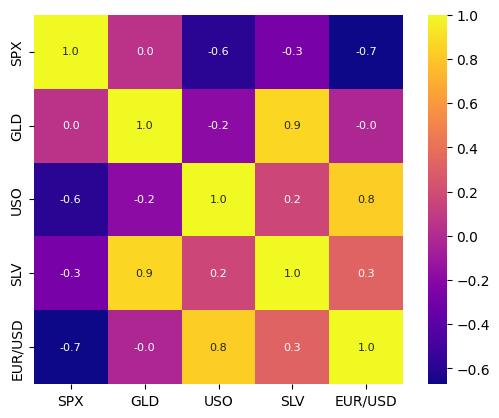

In [15]:
sns.heatmap(dataset.corr(), cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='plasma')

In [16]:
correlation = dataset.corr()

for column in dataset.columns:
  if column == "Date":
    print("Date haven't correlation")
    print("***"*10)
  else:
    print("correlation of ",column, ":")
    print(correlation[column])
    print("***"*10)

Date haven't correlation
******************************
correlation of  SPX :
SPX        1.000000
GLD        0.049345
USO       -0.591573
SLV       -0.274055
EUR/USD   -0.672017
Name: SPX, dtype: float64
******************************
correlation of  GLD :
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64
******************************
correlation of  USO :
SPX       -0.591573
GLD       -0.186360
USO        1.000000
SLV        0.167547
EUR/USD    0.829317
Name: USO, dtype: float64
******************************
correlation of  SLV :
SPX       -0.274055
GLD        0.866632
USO        0.167547
SLV        1.000000
EUR/USD    0.321631
Name: SLV, dtype: float64
******************************
correlation of  EUR/USD :
SPX       -0.672017
GLD       -0.024375
USO        0.829317
SLV        0.321631
EUR/USD    1.000000
Name: EUR/USD, dtype: float64
******************************


<ipython-input-16-81e55c60ab8d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = dataset.corr()


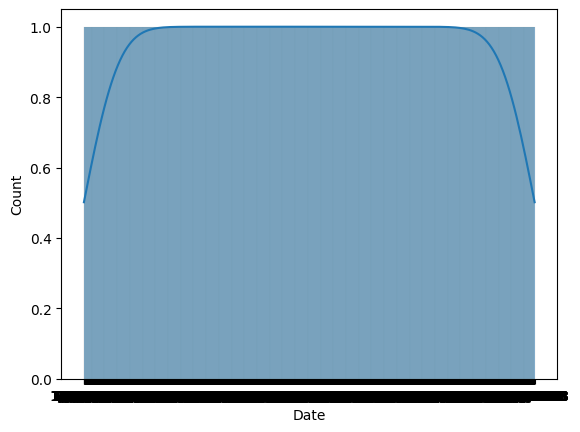

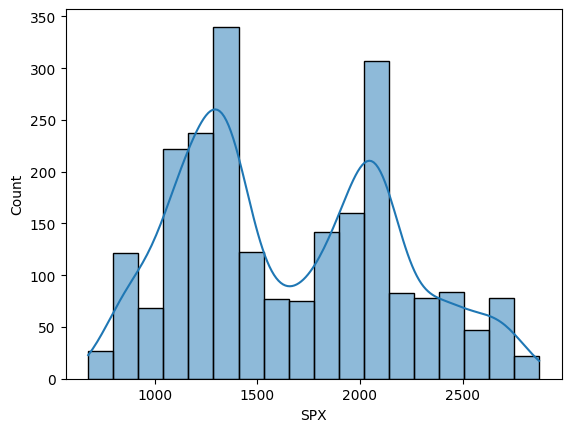

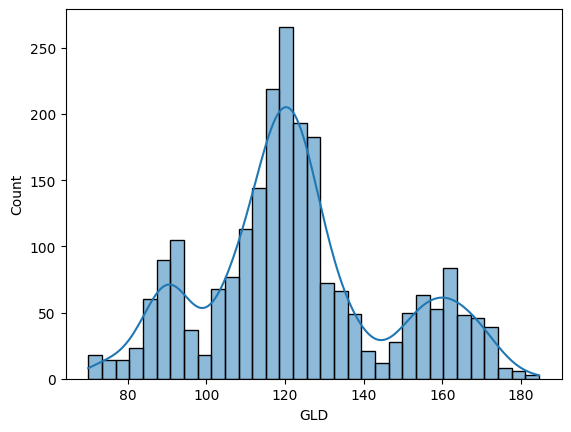

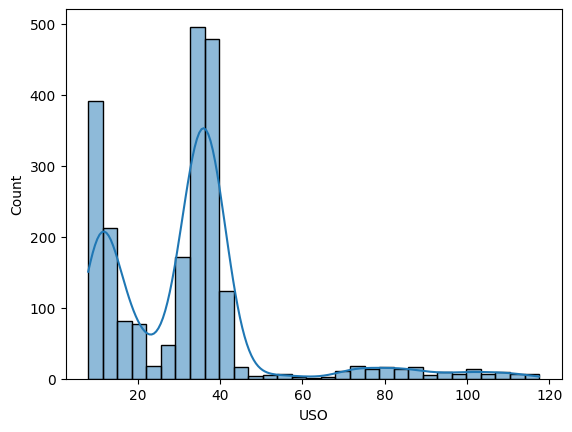

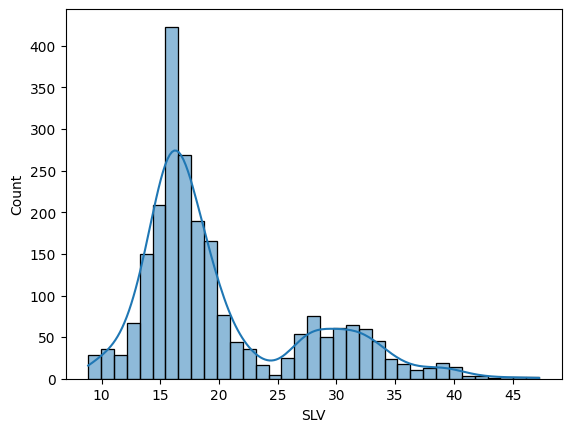

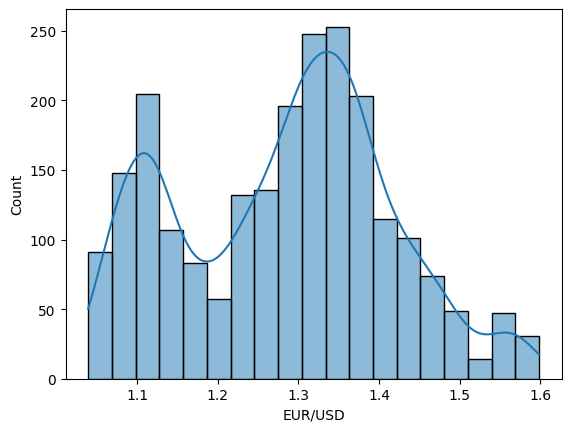

In [17]:
# Plot the distribution of a feature using a histogram
for column in dataset.columns:
  sns.histplot(data=dataset, x=column, kde=True)

# Show the plot
  plt.show()

In [19]:
XG=dataset[['SPX', 'USO', 'SLV', 'EUR/USD']]
YG=dataset['GLD']

In [20]:
XS=dataset[['SPX', 'USO', 'GLD', 'EUR/USD']]
YS=dataset['SLV']

In [21]:
model = LinearRegression()

# Fit the model to the data
model.fit(XG, YG)
model.fit(XS, YS)


LinearRegression()

In [51]:
%%writefile app.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import streamlit as st
from PIL import Image


dataset= pd.read_csv('/content/gld_price_data.csv')
image= Image.open('/content/gold_silver.jpg')
st.title("PREDICTION OF GOLD AND SILVER PRICES")
st.image(image, use_column_width=True)
Prediction= st.checkbox("Prediction")
Data_Analysis= st.checkbox("SHOW DATA ANALYSIS")

if Data_Analysis:

  st.write("**Head of Dataset:** ", dataset.head())
  st.write("**DESCRIPTION of Dataset:** ", dataset.describe())
  st.write("**CHECH NULL VALUES:** ", dataset.isnull().sum())
  st.write("**CHECH DUPLICATED VALUES:** ", dataset.duplicated().sum())
  for column in dataset.columns:
    unique_values = dataset[column].unique()
    if unique_values.size > 0:
        st.write(column, "**has**", unique_values.size, "**unique values**")
    else:
        st.write(column, "**doesn't have any unique values**")
  for column in dataset.columns:
    st.write(column)
    st.write(dataset[column].value_counts())
    st.write(dataset[column].value_counts().sum())


  st.write("**CORRELATION OF THIS DATASET:** ")
  corr_matrix = dataset.corr()
  fig, ax = plt.subplots()
  sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
  st.pyplot(fig)

  correlation = dataset.corr()
  for column in dataset.columns:
    if column == "Date":
      st.write("**Date haven't correlation**")
    else:
      st.write("correlation of ",column, ":")
      st.write(correlation[column])


  for column in dataset.columns:
    if column=="Date":
       print("**NO DISTRIBUTION FOR DATE **")
    else:

       fig, ax = plt.subplots()
       ax.hist(dataset[column], bins=30)
       ax.set_title(f"**Distribution of {column}**")
       ax.set_xlabel("Value")
       ax.set_ylabel("Frequency")
       st.pyplot(fig)


else:

    if Prediction :
       Gold_Prediction= st.checkbox("Gold Prediction")
       Silver_Prediction= st.checkbox("Silver Prediction")

       if Gold_Prediction:

         XG=dataset[['SPX', 'USO', 'SLV', 'EUR/USD']]
         YG=dataset['GLD']
         SPX=st.number_input("Enter SPX")
         USO=st.number_input("Enter USO")
         SLV=st.number_input("Enter SLV")
         EUR_USD=st.number_input("Enter EUR_USD")
         model = LinearRegression()
         model.fit(XG, YG)
         prediction_G=model.predict([[SPX, USO, SLV, EUR_USD]])[0]
         if st.button("PREDICT GOLD PRICE"):
             st.header("The Gold Price is {}".format(int(prediction_G)))
         gold_accuracy = model.score(XG, YG)
         st.write("Accuracy is: ", gold_accuracy, "With Linear Regression Model ")



       else:
         XS=dataset[['SPX', 'USO', 'GLD', 'EUR/USD']]
         YS=dataset['SLV']
         SPX=st.number_input("Enter SPX")
         USO=st.number_input("Enter USO")
         GLD=st.number_input("Enter GLD")
         EUR_USD=st.number_input("Enter EUR_USD")
         model = LinearRegression()
         model.fit(XS, YS)
         prediction_S=model.predict([[SPX, USO, GLD, EUR_USD]])[0]
         if st.button("PREDICT SILVER PRICE"):
             st.header("The Silver Price is {}".format(int(prediction_S)))

         silver_accuracy = model.score(XS, YS)
         st.write("Accuracy is: ", silver_accuracy, "With Linear Regression Model")





Overwriting app.py


In [53]:
!streamlit run /content/app.py & npx localtunnel --port 8501 & curl ipv4.icanhazip.com

34.143.239.206
[..................] \ fetchMetadata: sill resolveWithNewModule axios@0.21.4 ch

npx: installed 22 in 2.598s

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.143.239.206:8501

your url is: https://pretty-yaks-see.loca.lt
/content/app.py:38: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataset.corr()
/content/app.py:43: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = dataset.corr()
**NO DISTRIBUTION FOR DATE **
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegr